Ejecutar todas las celdas una a una y en orden, al menos la primera vez.



# Iteramos la función

In [ ]:
pip install tqdm

In [ ]:
# Definimos la función que queremos iterar

def collatz_function(x, string):
    if string.upper() == 'C': # Elegimos qué función iterar en función de la entrada
        # par
        if x % 2 == 0:
            return x // 2  # División entera
        # impar
        else:
            return 3 * x + 1
    else:
        # par
        if x % 2 == 0:
            return x // 2  # División entera
        # impar
        else:
            return (3 * x + 1) // 2

In [ ]:
import csv
import numpy as np
import math
from tqdm import tqdm

#----------------------------------------------- Parámetros de la ejecución ----------------------------------------------------------------

funcion_iterar = 'C' # C (mayúscula) para usar C(x), T (mayúscula) para iterar T(x)

guardar = True # True si queremos guardar los cálculos en un fichero .csv. False en caso contrario.
nombre_archivo = 'prueba.csv' # Nombre del archivo que crearemos. PRECAUCIÓN: si guardar = False y el nombre del archivo
                              # coincide con uno existente, este se borrará

rango = True # True si queremos hacer el cálculo para un intervalo entre dos valores, por ejemplo, [1, 10^7]. False si queremos elegir qué
             # valores queremos iterar, por ejemplo, [10, 4, 7564, 2345346]
# Si hemos elegido rango = True, elegir los valores iniciales y finales del intervalo. Si rango = False estos valores no intervienen en el programa
valor_inicial = 1
valor_final = pow(10, 4)
# Si hemos elegido rango = False, elegir los valores que queremos iterar introduciéndolos en el siguiente vector. Si rango = True, el vector
# no interviene en ningún cálculo
vector_iterar = [1346, pow(10, 50) - 1, pow(10, 500) + 1]

random = False # True si queremos escoger número aleatorios en el intervalo que hemos elegido
num_random = 30 # Número de elementos aleatorios que queremos seleccionar del intervalo


if rango is True and random is True:
    vector_iterar = np.random.randint(valor_inicial, valor_final, num_random)
elif rango is True and random is False:
    vector_iterar = np.arange(valor_inicial, valor_final + 1)

precision = 3  # número decimales para la notación científica
aux = 0

#--------------------------------------------------- Bucle de ejecución -------------------------------------------------------------------


with open(nombre_archivo, mode='w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    encabezado = ['Número', 't_parada', 't_parada_total', 'pico_max', 's', 'proporcion_pares', 'secuencia'] # Primero fila del .csv
    escritor_csv.writerow(encabezado)

    # La siguiente línea es el bucle for. Para rangos muy grande, la línea (1) puede dar problemas de memoria. Si es así,
    # simplemente comentarla y descomanetar la línea (2)
    for n in tqdm(vector_iterar, desc=f'Iterando {funcion_iterar}(x)', unit=" elemento"):   # (1)
    #for n in tqdm(range(valor_inicial, valor_final + 1), desc=f'Iterando {funcion_iterar}(x)', unit=" elemento"): # (2)

        # Parámetros que iremos actualizando y luego guardaremos
        n_inicial = n
        numero_iteraciones = 0
        tiempo_parada = 0
        secuencia = []
        secuencia.append(n)

        # Contamos si el número inicial es par o impar para llevar bien la cuenta de estos
        if n % 2 == 0:
            numero_pares = 1
        else:
            numero_pares = 0

        # Iteramos cada valor con la función elegida. También contamos los números pares e impares
        while n != 1:
            n = collatz_function(n, funcion_iterar)
            secuencia.append(n)
            numero_iteraciones += 1

            if n % 2 == 0:
                numero_pares += 1

            if n < n_inicial and tiempo_parada == 0:
                tiempo_parada = numero_iteraciones


        # Calculamos algunos parámetros que luego guardaremos
        pico_maximo = max(secuencia)
        s = max(secuencia) / n_inicial
        proporcion_pares = numero_pares / len(secuencia)
        aux = aux + proporcion_pares



        if guardar is True:
            # Elegimos qué cantidades queremos guardar. Si se cambia, acordarse de cambiar el encabezado del archivo
            guardar_vector = [n_inicial,
                              tiempo_parada,
                              numero_iteraciones,
                              "{:.{}e}".format(pico_maximo, precision),
                              s,
                              round(proporcion_pares, 3),
                              secuencia]
            escritor_csv.writerow(guardar_vector)

        # Si queremos ir mostrando algunos datos para los números que vamos calculando, descomentar las siguientes líneas
        '''
        print(f'Proporción de número pares en la secuencia: {proporcion_pares}')
        print(f'Secuencia: {secuencia}')
        print(f'Número de iteraciones: {numero_iteraciones}\nTiempo de parada: {tiempo_parada}')
        print(f'Pico máximo: {pico_maximo}')
        print(f'Factor de expansión: {s}')
        print('--------------------------------------------------------------------------')
        '''

    proporcion_pares_total = aux / len(vector_iterar)
    print(f'Proporción total de números pares: {proporcion_pares_total}')


Iterando C(x): 100%|██████████| 10000/10000 [00:03<00:00, 3146.15 elemento/s]

Proporción total de números pares: 0.6783835810822819


# Analizamos los resultados

In [ ]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [ ]:
# Leemos el archivo guardado

encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        collatz_df = pd.read_csv('prueba.csv', encoding=encoding, index_col = 0)
        print(f"CSV file read successfully with encoding: {encoding}")
        break  # Break out of the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

CSV file read successfully with encoding: utf-8


In [ ]:
collatz_df['secuencia'] = collatz_df['secuencia'].apply(ast.literal_eval) # para que las secuancias las interprete como números y no como strings. Puede tardar unos segundos

In [ ]:
collatz_df.head(10)

,t_parada,t_parada_total,pico_max,s,proporcion_pares,secuencia
Número,,,,,,
1,0,0,1.0,1.000000,0.000,[1]
2,1,1,2.0,1.000000,0.500,"[2, 1]"
3,6,7,16.0,5.333333,0.625,"[3, 10, 5, 16, 8, 4, 2, 1]"
4,1,2,4.0,1.000000,0.667,"[4, 2, 1]"
5,3,5,16.0,3.200000,0.667,"[5, 16, 8, 4, 2, 1]"
6,1,8,16.0,2.666667,0.667,"[6, 3, 10, 5, 16, 8, 4, 2, 1]"
7,11,16,52.0,7.428571,0.647,"[7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5,..."
8,1,3,8.0,1.000000,0.750,"[8, 4, 2, 1]"
9,3,19,52.0,5.777778,0.650,"[9, 28, 14, 7, 22, 11, 34, 17, 52, 26, 13, 40,..."


In [ ]:
# Función para poner algún texto en notación científica natural

def formatear_latex(numero):
    exponente = 0
    if numero <= 1000 and numero >= 1:
        return int(numero)
    elif numero < 1:
        return round(numero, 4)
    else:
        while numero >= 10:
            numero /= 10
            exponente += 1
            if numero == 1.0:
                return f'10^{{{exponente}}}'
        return f"{numero:.2f} \cdot 10^{{{exponente}}}"

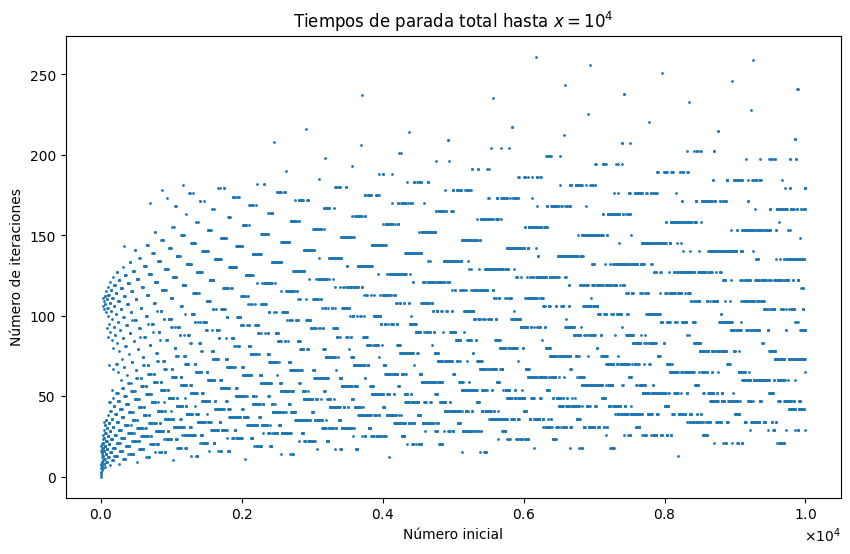

In [ ]:
# Dibujamos los tiempos de parada total

plt.figure(figsize=(10, 6))

collatz_df['t_parada_total'].plot(marker = 'o', linestyle = '', markersize = 1)
plt.ylabel('Número de iteraciones')
plt.xlabel('Número inicial')
plt.title(fr'Tiempos de parada total hasta $x={formatear_latex(len(collatz_df))}$')

# Utilizar ScalarFormatter para notación científica en el eje x
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Establecer límites de potencia para mostrar notación científica
plt.gca().xaxis.set_major_formatter(formatter)


# Podemos guardar la imagen descomentando la línea siguiente
# plt.savefig('Figures/tiempos_parada_totales.pdf', bbox_inches='tight')

t_parada_total
52    190
47    184
39    175
44    160
60    153
57    149
49    142
65    142
34    142
36    138
Name: count, dtype: int64
Número de tiempos de parada distintos: 224


Text(0.5, 1.0, 'Repetición de tiempos de parada totales hasta $x = 10^{4}$')

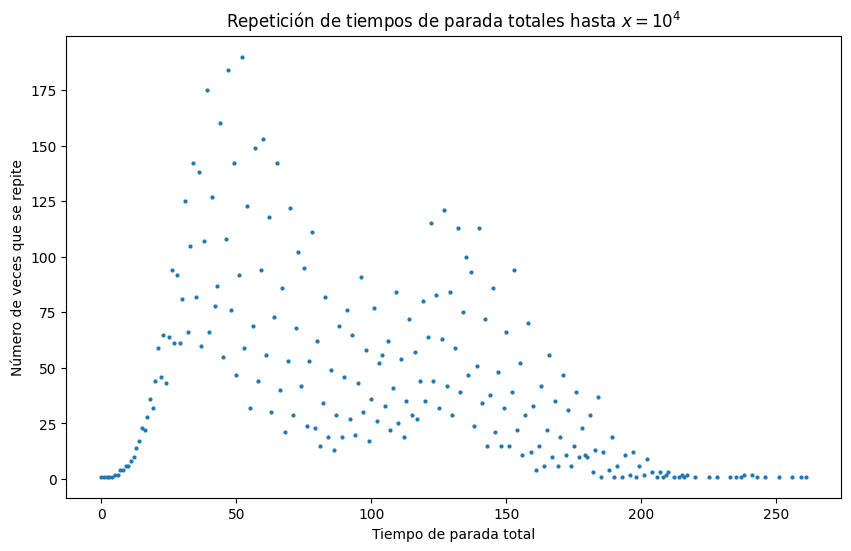

In [ ]:
# Contamos el número de distintos tiempos de parada

conteo_t_parada_total = collatz_df['t_parada_total'].value_counts()
print(conteo_t_parada_total.head(10))
print(f'Número de tiempos de parada distintos: {len(conteo_t_parada_total)}')

# Lo graficamos
plt.figure(figsize=(10, 6))
conteo_t_parada_total.plot(marker = 'o', markersize = 2, linestyle = '')
plt.xlabel('Tiempo de parada total')
plt.ylabel('Número de veces que se repite')
plt.title(fr'Repetición de tiempos de parada totales hasta $x = {formatear_latex(collatz_df.index.max())}$')
#plt.savefig('Figures/repeticion_tiempos_parada_totales.pdf', bbox_inches='tight')


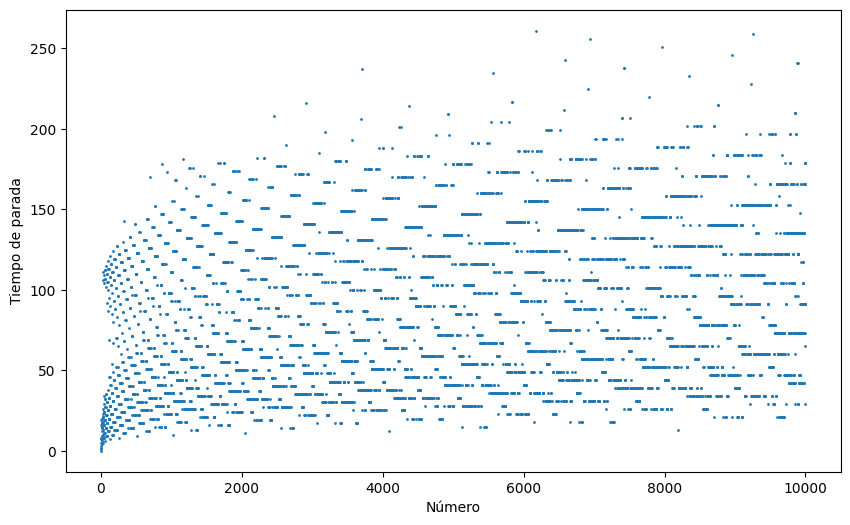

In [ ]:
# Pintamos el tiempo de parada para cada número

plt.figure(figsize=(10, 6))
collatz_df['t_parada_total'].plot(marker = 'o', linestyle = '', markersize = 1)
plt.ylabel('Tiempo de parada')
#plt.xlim(1, 1000)
#plt.ylim(0, 20)
plt.show()

Text(0.5, 1.0, 'Máximo de la secuencia $3x + 1$ de cada número hasta el $10^{4}$')

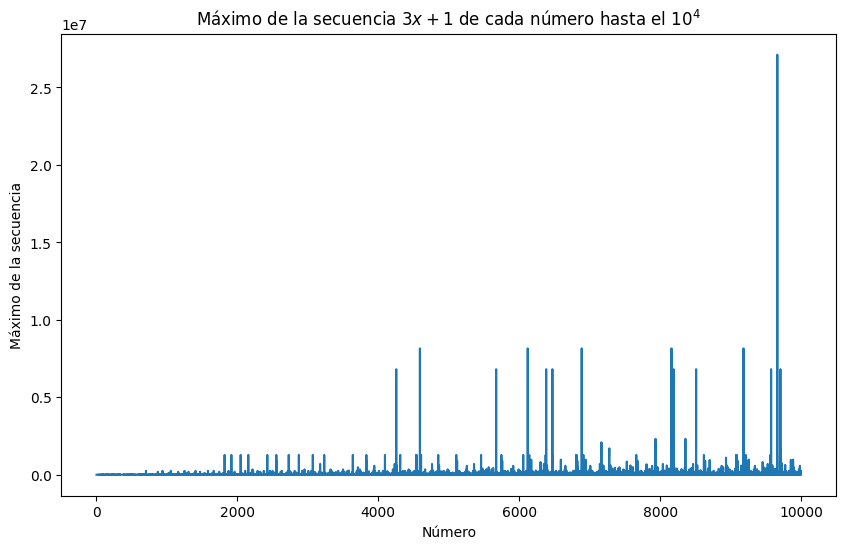

In [ ]:
# Pintamos el máximo de cada secuencia

plt.figure(figsize=(10, 6))
collatz_df['pico_max'].plot()
plt.ylabel('Máximo de la secuencia')
plt.title(fr'Máximo de la secuencia $3x + 1$ de cada número hasta el ${formatear_latex(collatz_df.index.max())}$')

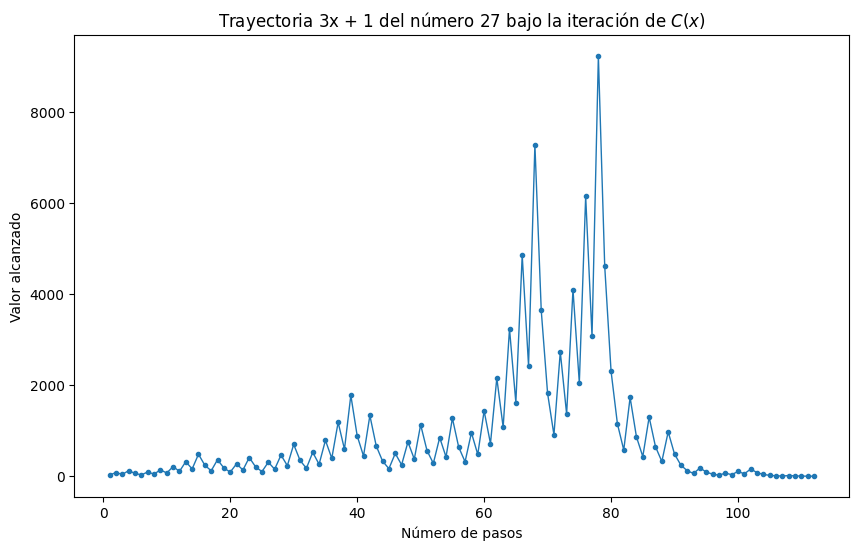

Text(0.5, 1.0, 'Trayectoria 3x + 1 del número 649')

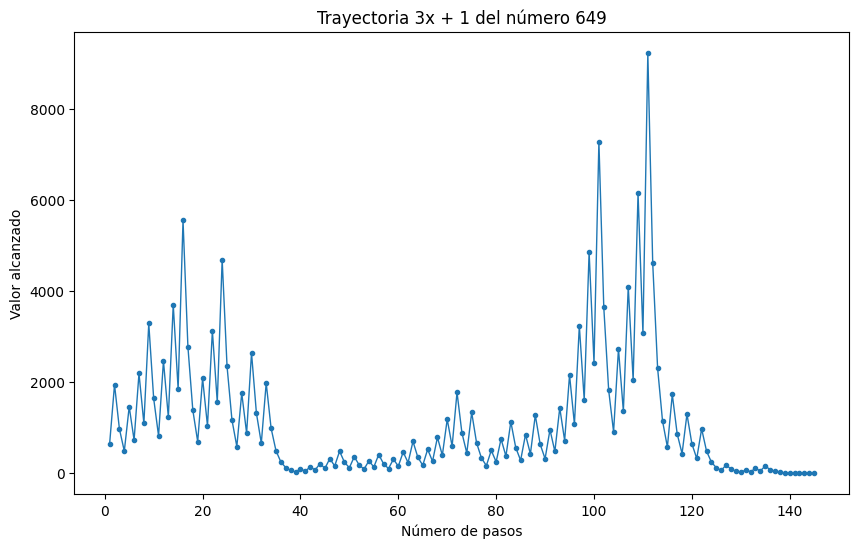

In [ ]:
# Pintamos alguna trayectoria, por ejemplo, la del 27 o la del 649

plt.figure(figsize=(10, 6))
secuncia_27 =  collatz_df.at[27, 'secuencia']
plt.plot(np.arange(1, len(secuncia_27)+1), secuncia_27, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title(r'Trayectoria 3x + 1 del número 27 bajo la iteración de $C(x)$')
plt.show()

plt.figure(figsize=(10, 6))
secuncia_649 =  collatz_df.at[649, 'secuencia']
plt.plot(np.arange(1, len(secuncia_649)+1), secuncia_649, marker = 'o', markersize = 3, linewidth = 1)
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title('Trayectoria 3x + 1 del número 649')

Text(0.5, 1.0, 'Trayectoria 3x + 1 de algunos $x$ cercanos')

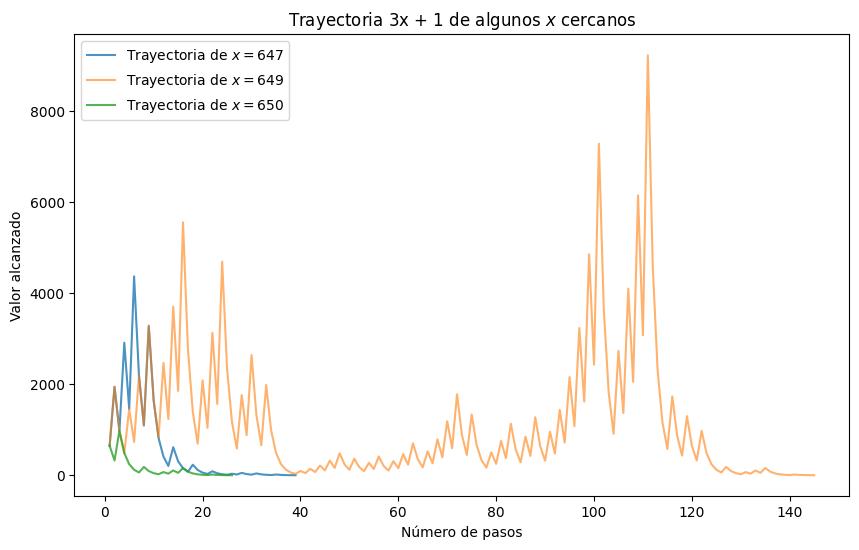

In [ ]:
# Comparamos trayectorias de algunos números cercanos


plt.figure(figsize=(10, 6))
secuncia_649 =  collatz_df.at[649, 'secuencia']
secuncia_650 =  collatz_df.at[650, 'secuencia']
secuncia_647 =  collatz_df.at[647, 'secuencia']

plt.plot(np.arange(1, len(secuncia_647)+1), secuncia_647, marker = '', markersize = 2, label = r'Trayectoria de $x = 647$', alpha = 0.8)
plt.plot(np.arange(1, len(secuncia_649)+1), secuncia_649, marker = '', markersize = 3, label = r'Trayectoria de $x = 649$', alpha = 0.6)
plt.plot(np.arange(1, len(secuncia_650)+1), secuncia_650, marker = '', markersize = 2, label = r'Trayectoria de $x = 650$', alpha = 0.8)

plt.legend()
plt.xlabel('Número de pasos')
plt.ylabel('Valor alcanzado')
plt.title(r'Trayectoria 3x + 1 de algunos $x$ cercanos' )
#plt.savefig('Figures/trayectoria_cercanos.pdf', bbox_inches='tight')

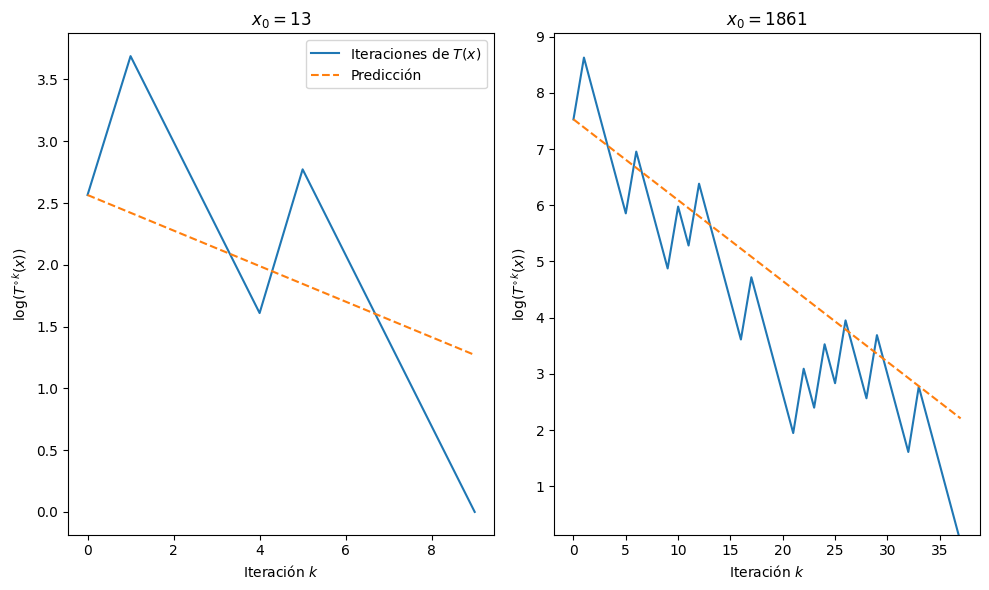

Número de pasos predicho para x = 13: 10
Número de pasos calculado para x = 13: 17.831961606378872
Número de pasos predicho para x = 1861: 38
Número de pasos calculado para x = 1861: 52.341972028936674


In [ ]:
# Comparamos ahora dos números con la predicción del modelo sencillo

m = -0.14384
numero1 = 13
numero2 = 1861
secuencia1 = np.log(collatz_df.loc[numero1, 'secuencia'])
secuencia2 = np.log(collatz_df.loc[numero2, 'secuencia'])

recta1 = m * np.arange(0, len(secuencia1)) + math.log(numero1)
recta2 = m * np.arange(0, len(secuencia2)) + math.log(numero2)


plt.figure(figsize=(10, 6))

# Crear subgráficas
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primera subgráfica
plt.plot(np.arange(0, len(secuencia1)), secuencia1, label = 'Iteraciones de $T(x)$')
plt.plot(np.arange(0, len(secuencia1)), recta1, linestyle = '--', label = 'Predicción')
plt.title(fr'$x_0 = {numero1}$')
plt.xlabel(r'Iteración $k$')
plt.ylabel(r'$\log(T^{\circ k}(x))$')
plt.legend()

plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segunda subgráfica
plt.plot(np.arange(0, len(secuencia2)), secuencia2)
plt.plot(np.arange(0, len(secuencia2)), recta2, linestyle = '--')
plt.ylim(1 - np.max(secuencia2) * 0.10, np.max(secuencia2) * (1.05) )
plt.title(fr'$x_0 = {numero2}$')
plt.xlabel(r'Iteración $k$')
plt.ylabel(r'$\log(T^{\circ k}(x))$')



# Ajustar diseño y mostrar gráficas
plt.tight_layout()
#plt.savefig('Figures/predicciones_modelo.pdf', bbox_inches = 'tight')
plt.show()

print(f'Número de pasos predicho para x = {numero1}: {len(secuencia1)}')
print(f'Número de pasos calculado para x = {numero1}: {-math.log(numero1)/m}')
print(f'Número de pasos predicho para x = {numero2}: {len(secuencia2)}')
print(f'Número de pasos calculado para x = {numero2}: {-math.log(numero2)/m}')

# Visualización artística

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import ast
import matplotlib.pyplot as plt



encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        datos = pd.read_csv('prueba.csv', encoding=encoding, index_col = 0)
        print(f"CSV file read successfully with encoding: {encoding}")
        break  # Break out of the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")

print('Conviertiendo secuencias (esto puede tardar un rato)')
datos['secuencia'] = datos['secuencia'].apply(ast.literal_eval) # para que las secuancias las interprete como números y no como strings

secuencias = np.array(datos['secuencia'].values)
for secuencia in tqdm(secuencias, desc='Formateando secuencias', unit='secuencia'):
    secuencia.reverse()
    del secuencia[0]

CSV file read successfully with encoding: utf-8
Conviertiendo secuencias (esto puede tardar un rato)


Formateando secuencias: 100%|██████████| 10000/10000 [00:00<00:00, 820257.36secuencia/s]


Pintando: 100%|██████████| 10000/10000 [00:09<00:00, 1012.47 secuencia/s]


Generando imagen (esto puede tardar un rato)
pdf generaddo
png generado


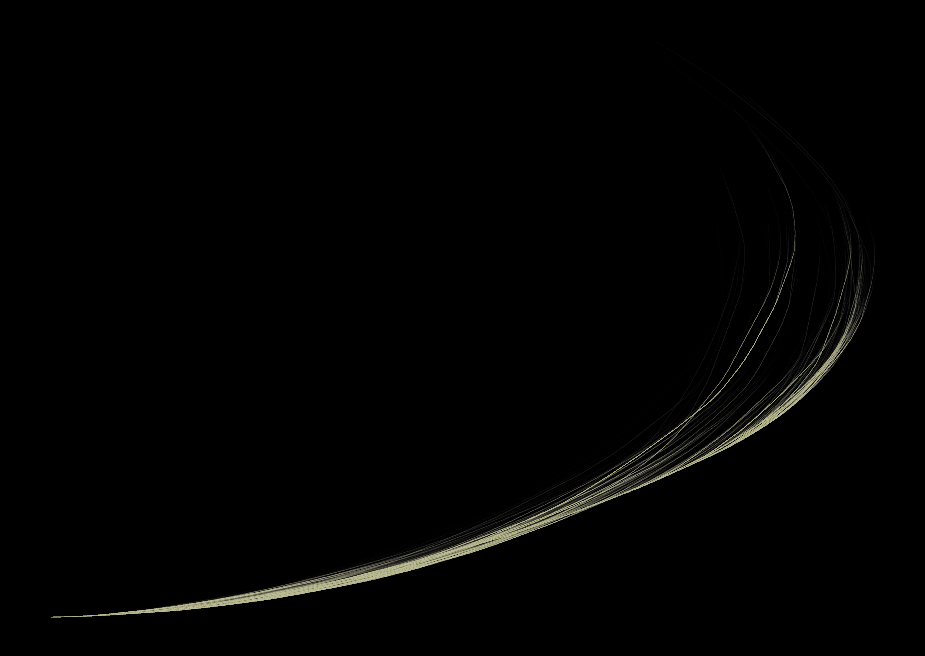

Finalizado


In [ ]:
# Aquí tenemos todos los colores que podemos poner para pintar trayectorias
# Podemos hacer que se escogan al azar como un elemento de este vector o simplemente ir probando

vector_colores = [
    'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque',
    'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue',
    'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson',
    'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen',
    'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange',
    'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue',
    'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink',
    'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite',
    'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod',
    'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred',
    'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon',
    'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray',
    'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen',
    'lightskyblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow',
    'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine',
    'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue',
    'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue',
    'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive',
    'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen',
    'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink',
    'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown', 'royalblue',
    'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver',
    'skyblue', 'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue',
    'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white',
    'whitesmoke', 'yellow', 'yellowgreen'
]


# Vectores en los que a su vez guardaremos todos los vectores para pintar las trayectorias
x = []
y = []

# Escogemos los ángulos dependiendo de la paridad
denominador_par = 100
denominador_impar = 100
angulo_par = np.pi / denominador_par
angulo_impar = - np.pi / denominador_impar



for secuencia in tqdm(secuencias, desc=f'Obteniendo vectores para hacer el gráfico', unit=" secuencia"):
    y_singular = []
    x_singular = []
    y_singular.append(1) # Empezamos en el (1, 1). Esto es completamente arbitrario, y como la idea es no pintar los ejes, da igual donde empecemos
    x_singular.append(1)
    angulo_total = 0
    for i in range(1, len(secuencia) - 1):
        if secuencia[i] % 2 == 0:
            angulo_total += angulo_par
            x_singular.append(x_singular[i - 1] + np.cos(angulo_total))
            y_singular.append(y_singular[i - 1] + np.sin(angulo_total))
        else:
            angulo_total += angulo_impar
            x_singular.append(x_singular[i - 1] + np.cos(angulo_total))
            y_singular.append(y_singular[i - 1] + np.sin(angulo_total))

    x.append(x_singular)
    y.append(y_singular)



color_grafico = 'lightgoldenrodyellow'
plt.figure(figsize=(11.69, 8.26), facecolor='black')
plt.axis('off')  # Elimina los ejes
for i in tqdm(range(len(x)), desc=f'Pintando', unit=" secuencia"):
    plt.plot(x[i], y[i], alpha = 0.02, color = color_grafico, linewidth=0.5)

print('Generando imagen (esto puede tardar un rato)')
plt.savefig(f'visualization_color_{color_grafico}_len_{len(secuencias)}_par_{denominador_par}_impar_{denominador_impar}.pdf', bbox_inches='tight')
print('pdf generaddo')
plt.savefig(f'visualization_color_{color_grafico}_len_{len(secuencias)}_par_{denominador_par}_impar_{denominador_impar}.png', dpi=600, bbox_inches='tight')  # Guardar el gráfico con una resolución de 300 dpi
print('png generado')
plt.show()
print('Finalizado')